USECASE:02    
 **RNN AND LSTM MODEL**


---



NAME:     K VINAY

---



ROLL N.O: **HU21CSEN0300505**

---


BRANCH  : CSE-AIML

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
df = pd.read_csv("/content/RnnAndLstm.csv")
df.head(20)

,Name,Description
0,NaN,NaN
1,Gnaneswar,Gnaneswar enjoys hiking in the mountains and e...
2,supreeth,Supreeth is passionate about photography and l...
3,purohit,Purohit is an adventure seeker and enjoys skyd...
4,ramesh,Ramesh is an avid reader and enjoys diving int...
5,niranjan,Niranjan is a music enthusiast and spends his ...
6,rakesh,Rakesh is a tech enthusiast and enjoys experim...
7,rohith,Rohith loves cooking and often experiments wit...
8,sathwik,Sathwik is a fitness freak and spends hours at...
9,renu,Renu is passionate about painting and finds so...


In [ ]:
# Replace missing values with empty strings
df['Description'] = df['Description'].fillna('')

In [ ]:
# Replace missing values with empty strings
df['Description'] = df['Description'].fillna('')# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Description'])
total_words = len(tokenizer.word_index) + 1

In [ ]:
# Create input sequences
input_sequences = []
for line in df['Description']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


In [ ]:
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = np.expand_dims(y, axis=-1)


**RNN MODEL**

In [ ]:
# Define RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model_rnn.add(SimpleRNN(150))  # Use SimpleRNN instead of LSTM
model_rnn.add(Dense(total_words, activation='softmax'))


In [ ]:
# Compile RNN model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train RNN model and store training history
history_rnn = model_rnn.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 11ms/step - loss: 5.3521 - accuracy: 0.0865
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 4.8442 - accuracy: 0.1265
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 4.5806 - accuracy: 0.1830
Epoch 4/100
19/19 [==============================] - 0s 11ms/step - loss: 4.3174 - accuracy: 0.2063
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 4.0526 - accuracy: 0.2413
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 3.8292 - accuracy: 0.2762
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 3.6034 - accuracy: 0.3095
Epoch 8/100
19/19 [==============================] - 0s 10ms/step - loss: 3.4081 - accuracy: 0.3161
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 3.2038 - accuracy: 0.3344
Epoch 10/100
19/19 [==============================] - 0s 10ms/step - loss: 3.0206 - accuracy: 0.3444

In [ ]:
# Generate predictions
def generate_next_word(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model_rnn.predict(token_list, verbose=0)[0]
        predicted_index = np.argmax(predicted_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text


In [ ]:
seed_text = "Yamini is a passionate dancer and expresses her"

# Generate next word prediction
predicted_text = generate_next_word(seed_text, next_words=1)

red_color = "\033[91m"
reset_color = "\033[0m"

# Extract the predicted word
predicted_word = predicted_text.split()[-1]

# Highlight the predicted word in red color
highlighted_predicted_text = predicted_text.replace(predicted_word, f"{red_color}{predicted_word}{reset_color}")

print(highlighted_predicted_text)



Yamini is a passionate dancer and expresses her emotions


In [ ]:
# Define seed texts
seed_texts = [

    "Gnaneswar enjoys hiking in the",
    "Purohit is an adventure seeker and enjoys",
    "Sathwik is a fitness freak and ",
    "Renu is passionate about painting and finds "
]

# Generate and print predictions for each seed text
for seed_text in seed_texts:
    predicted_text = generate_next_word(seed_text, next_words=5)  # predecting the next 5 words
    print(f"{predicted_text}\n")


Gnaneswar enjoys hiking in the mountains and exploring nature trails

Purohit is an adventure seeker and enjoys skydiving and bungee jumping movements

Sathwik is a fitness freak and  spends hours at the gym

Renu is passionate about painting and finds  solace in creating art like



**LSTM MODEL**

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model_lstm.add(LSTM(150, return_sequences=True))
model_lstm.add(LSTM(150))
model_lstm.add(Dense(total_words, activation='softmax'))


In [ ]:
# Compile LSTM model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model and store training history
history_lstm = model_lstm.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
19/19 [==============================] - 6s 65ms/step - loss: 5.4877 - accuracy: 0.0682
Epoch 2/100
19/19 [==============================] - 1s 64ms/step - loss: 4.9504 - accuracy: 0.1215
Epoch 3/100
19/19 [==============================] - 1s 64ms/step - loss: 4.7760 - accuracy: 0.1181
Epoch 4/100
19/19 [==============================] - 1s 63ms/step - loss: 4.6259 - accuracy: 0.1514
Epoch 5/100
19/19 [==============================] - 1s 62ms/step - loss: 4.4600 - accuracy: 0.1730
Epoch 6/100
19/19 [==============================] - 1s 64ms/step - loss: 4.3070 - accuracy: 0.1747
Epoch 7/100
19/19 [==============================] - 1s 64ms/step - loss: 4.1610 - accuracy: 0.1930
Epoch 8/100
19/19 [==============================] - 2s 91ms/step - loss: 4.0107 - accuracy: 0.2080
Epoch 9/100
19/19 [==============================] - 2s 122ms/step - loss: 3.8867 - accuracy: 0.2213
Epoch 10/100
19/19 [==============================] - 1s 67ms/step - loss: 3.7419 - accuracy: 0.241

In [ ]:

# Generate predictions
def generate_next_word(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model_lstm.predict(token_list, verbose=0)[0]
        predicted_index = np.argmax(predicted_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [ ]:
seed_text = "Rashmitha  is a fashion icon and sets trends with her unique sense of "

# Generate next word prediction
predicted_text = generate_next_word(seed_text, next_words=1)


red_color = "\033[91m"
reset_color = "\033[0m"

# Extract the predicted word
predicted_word = predicted_text.split()[-1]

# Highlight the predicted word in red color
highlighted_predicted_text = predicted_text.replace(predicted_word, f"{red_color}{predicted_word}{reset_color}")

print(highlighted_predicted_text)




Rashmitha  is a fashion icon and sets trends with her unique sense of  style


In [ ]:

# Define seed texts
seed_texts = [
    "Gnaneswar enjoys hiking in the",
    "Niranjan is a music enthusiast and spends",
    "Rakesh is a tech enthusiast and enjoys",
    "Krishna is a travel enthusiast and ",
    "Ramesh is an avid reader and enjoys"
]

# Generate and print predictions for each seed text
for seed_text in seed_texts:
    predicted_text = generate_next_word(seed_text, next_words=5)
    print(f"{predicted_text}\n")

Gnaneswar enjoys hiking in the mountains and exploring nature trails

Niranjan is a music enthusiast and spends his free time composing songs

Rakesh is a tech enthusiast and enjoys experimenting with new gadgets to

Krishna is a travel enthusiast and  enjoys exploring different cultures social

Ramesh is an avid reader and enjoys diving into mystery novels sustainable



**EVALUATING THE MODEL**

In [ ]:
# Evaluate RNN model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X, y, verbose=0)
print('RNN Model - Accuracy: %.2f' % (accuracy_rnn * 100))
print('RNN Model - Loss: %.2f\n' % (loss_rnn))

# Evaluate LSTM model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X, y, verbose=0)
print('LSTM Model - Accuracy: %.2f' % (accuracy_lstm * 100))
print('LSTM Model - Loss: %.2f' % (loss_lstm))


RNN Model - Accuracy: 99.83
RNN Model - Loss: 0.02

LSTM Model - Accuracy: 89.02
LSTM Model - Loss: 0.47


**COMPARING THE RNN MODEL AND LSTM MODEL**

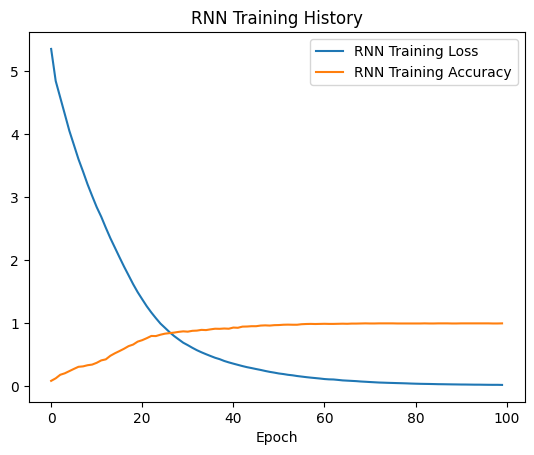

In [ ]:
# Plot training history for RNN model
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.title('RNN Training History')
plt.xlabel('Epoch')
plt.legend()
plt.show()

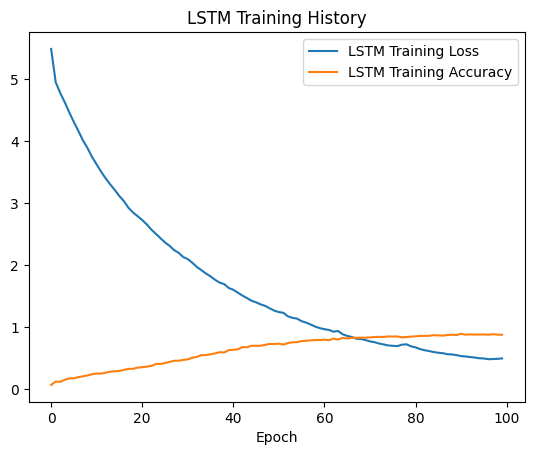

In [ ]:
# Plot training history for LSTM model
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.legend()
plt.show()

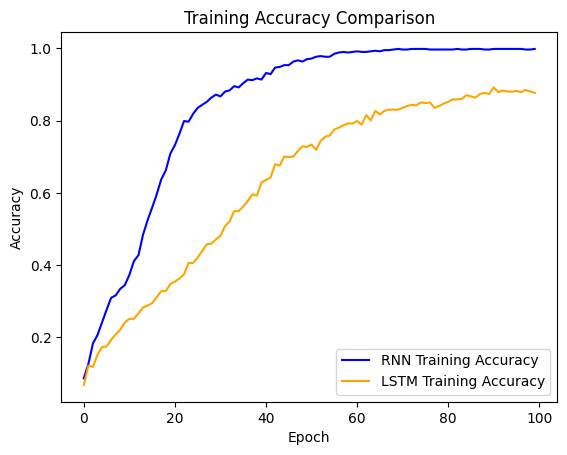

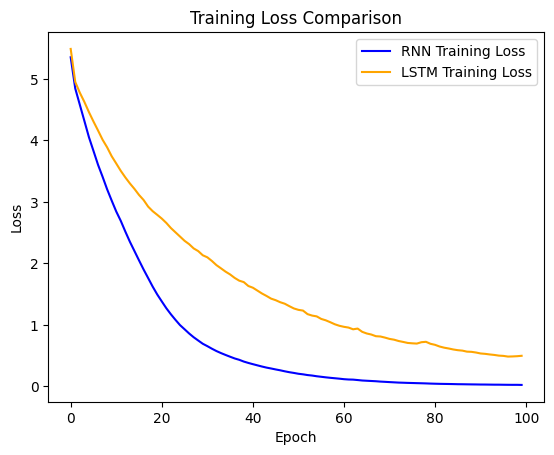

In [ ]:


# Plot training accuracy
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy', color='blue')
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy', color='orange')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss
plt.plot(history_rnn.history['loss'], label='RNN Training Loss', color='blue')
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss', color='orange')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
!jupyter nbconvert --to html "RNN&LSTM.ipynb"
